# Assignment 2

# Part A: Classic recognition

Questions 1–3 are coding questions. You will implement different image representations and train linear classifiers with them. You will start with more flexible image representations and progressively move onto more rigid representations. Questions 4-6 are written questions to be answered in the PDF. You will report and reflect on the results, analyze the pros/cons of each representation and discuss possible improvements. 

In [177]:
%load_ext autoreload
%autoreload 2
### ↑ add these two lines so the updates in .py files are reflected 
###   to the notebook without needing to restart the kernel

import os, pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt

import sklearn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

from utils import get_CIFAR10_data, train, evaluate

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Setup

#### We provide you with a linear (softmax) classifier, as well as code to load the CIFAR-10 dataset.

The CIFAR-10 dataset consists of 60,000 32x32 colour images in 10 classes, with 6,000 images per class. There are 50,000 training images and 10,000 test images. See the dataset website for more details: https://www.cs.toronto.edu/~kriz/cifar.html.

**Do this:** Download the dataset from this link (https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz), place it where you want, and untar it. Then try running the below code to see if you can load the dataset. 

In [93]:
! tar -xzf cifar-10-python.tar.gz
! mkdir -p data
! mv cifar-10-batches-py data/

tar: Error opening archive: Failed to open 'cifar-10-python.tar.gz'
mv: cifar-10-batches-py: No such file or directory


In [94]:
meta = pickle.load(open('data/cifar-10-batches-py/batches.meta', 'rb'), encoding='bytes')
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data(cifar10_dir='data/cifar-10-batches-py',
                                                                  num_training=4500, 
                                                                  num_validation=500, 
                                                                  num_test=1000)

Train data shape:  (4500, 32, 32, 3)
Train labels shape:  (4500,)
Validation data shape:  (500, 32, 32, 3)
Validation labels shape:  (500,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


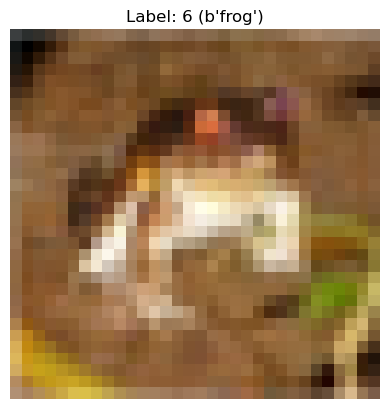

In [95]:
# Visualize a sample image
i = 0
label = y_train[i]
class_name = meta[b'label_names'][label]
plt.imshow(np.uint8(X_train[i])); plt.axis('off')
plt.title('Label: {} ({})'.format(label, class_name)); plt.show()

## Question 1. Color features (5 points)

First, we are going to explore using average color features to train a classifier. For each RGB color channel, average the pixel intensities. So a 32x32x3 image will be represented in a 1x3 vector.

**Do this:** Implement the `load_average_color_with_bias()` in `assn2.py` that computes average color features. Then train a classifier. Tune the regularization strength to train a good classifier.

In [96]:
# Freshly load the data
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data(cifar10_dir='data/cifar-10-batches-py',
                                                                  num_training=4500, 
                                                                  num_validation=500, 
                                                                  num_test=1000)

Train data shape:  (4500, 32, 32, 3)
Train labels shape:  (4500,)
Validation data shape:  (500, 32, 32, 3)
Validation labels shape:  (500,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [97]:
from assn2 import load_average_color_with_bias

X_train = load_average_color_with_bias(X_train)
X_val = load_average_color_with_bias(X_val)
X_test = load_average_color_with_bias(X_test)

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (4500, 4)
Train labels shape:  (4500,)
Validation data shape:  (500, 4)
Validation labels shape:  (500,)
Test data shape:  (1000, 4)
Test labels shape:  (1000,)


In [121]:
# TODO : Define regularization strengths. Put multiple values, more than 5,
#        See which regularization strength gives the best validation accuracy. 
#        Expect to get an accuracy of over 10% on the validation dataset.

regularization_strengths = [0.01, 1, 1.5, 2, 5, 10, 50, 100 ] #2

# Train a classifier
best_color = train(X_train, y_train, X_val, y_val, X_test, y_test, regularization_strengths, skip_test=True)

reg 1.000000e-02 train accuracy: 0.128000 val accuracy: 0.148000
reg 1.000000e+00 train accuracy: 0.142000 val accuracy: 0.152000
reg 1.500000e+00 train accuracy: 0.131556 val accuracy: 0.136000
reg 2.000000e+00 train accuracy: 0.125778 val accuracy: 0.130000
reg 5.000000e+00 train accuracy: 0.110889 val accuracy: 0.114000
reg 1.000000e+01 train accuracy: 0.135111 val accuracy: 0.146000
reg 5.000000e+01 train accuracy: 0.132667 val accuracy: 0.146000
reg 1.000000e+02 train accuracy: 0.118444 val accuracy: 0.124000

best validation accuracy achieved during training: 0.152000


final test set accuracy: 0.355000
[[27  8  2  0  0  0  3  4 12  2]
 [ 3 19  2  2  1  5  2  1  4 10]
 [ 3  4 12  1  8  4  7  3  2  1]
 [ 2  2  4  4  4 10  6  1  4  6]
 [ 4  1  4  6 10  4  7  6  1  1]
 [ 1  0  2 10  5 23  5  1  3  2]
 [ 0  4  3  2  5  9 27  0  1  1]
 [ 0  7  3  1  7  0  5 19  2  2]
 [15  5  0  0  0  5  0  1 28 10]
 [ 5  8  2  0  1  0  3  4  3 21]]


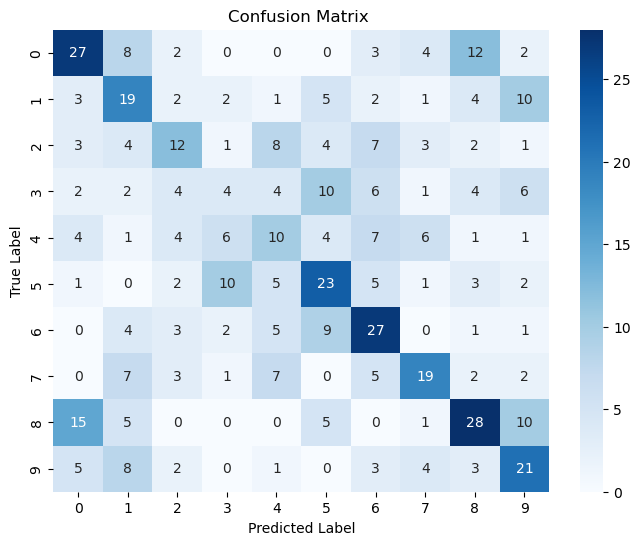

In [182]:
# Now with the best parameter you found, get the test accuracy. 
evaluate(best_color, X_test, y_test)

y_pred = best_color.predict(X_val)   # your trained model's predictions
cm = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
print(cm)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix ")
plt.show()


## Question 2. Bag of SIFT features (15 points)

Bag of words models are a popular technique for image classification inspired by models used in natural language processing. The model ignores or downplays word arrangement (spatial information in the image) and classifies based on a histogram of the frequency of visual words. The visual word "vocabulary" is established by clustering a large corpus of local features. In this question, you will extract SIFT features from the training images. These result in a Nx128 dimensional matrix where N is the number of keypoints. After extracting SIFT features from all training images, we can use the K-means clustering algorithm to cluster these features into K clusters each represented by a 128-dimensional centroid. Now we have a bag of visual words (clusters) and can represent each image as a histogram of SIFT features assigned to these clusters. Specifically, each image will be represented as a K-dimensional histogram. Using these representations, you can train a classifier as before.

**Do this**: Extract SIFT features. Do K-means clustering of the training images' SIFT features. Construct a histogram representation of the images and train a classifier. Specifically, implement `extract_sift()` in `features.py` and `load_flatten()` in `assn2.py`.

#### Example for extracting SIFT features

Check out OpenCV's tutorial on extracting SIFT features: https://docs.opencv.org/3.4/da/df5/tutorial_py_sift_intro.html.

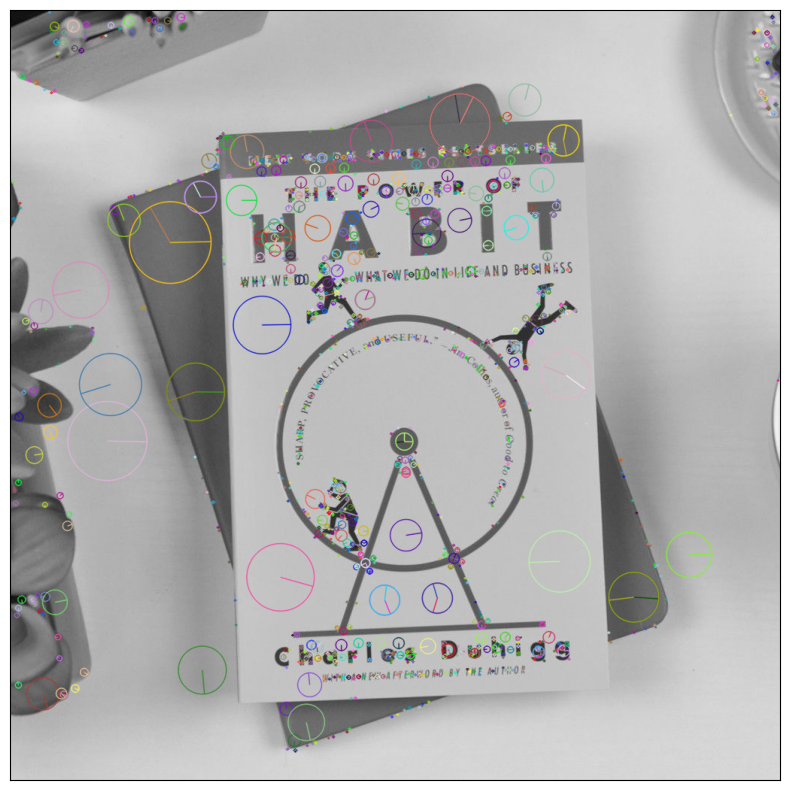

In [123]:
# Read in the image
img = cv2.imread('imgs/table.jpeg')

# Convert to greyscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Create a SIFT feature extractor
sift = cv2.SIFT_create() # or cv2.xfeatures2d.SIFT_create()

# Detect features from the image
keypoints, descriptors = sift.detectAndCompute(gray, None)

# Draw and visualize the detected keypoints on the image
sift_image = cv2.drawKeypoints(gray, keypoints, img, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10, 10))
plt.imshow(sift_image)
plt.xticks([]), plt.yticks([])
plt.show()

#### Your work starts here

In [185]:
# Freshly load the data
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data(cifar10_dir='data/cifar-10-batches-py',
                                                                  num_training=4500, 
                                                                  num_validation=500, 
                                                                  num_test=1000)

Train data shape:  (4500, 32, 32, 3)
Train labels shape:  (4500,)
Validation data shape:  (500, 32, 32, 3)
Validation labels shape:  (500,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [186]:
# TODO: Write a function extract sift featuress
from features import extract_sift_for_dataset
from assn2 import load_flatten

In [187]:
# TODO: Define step_size (sampling density) for sampling keypoints in a grid.
step_size = 4

# Extract dense SIFT features.
X_train_features = extract_sift_for_dataset(X_train, step_size=step_size)
X_val_features = extract_sift_for_dataset(X_val, step_size=step_size)
X_test_features = extract_sift_for_dataset(X_test, step_size=step_size)

# Flatten to [imagenumber x keypoint number per image, descriptor size]
X_train_features_flattened = load_flatten(X_train_features)

In [188]:
# the extracted SIFT features and build a visual vocabulary.
# This will take time even with well optimized code! Try to balance K, niter if it is too slow. 
from kmeans import kmeans

K = 30
niter = 4
labels_train, centroids = kmeans(X_train_features_flattened, K, niter)

Now that we have our visual features, we would like to compute the histogram storing the number of times a feature belongs to each cluster. Implement `load_histogram_with_bias` in `assn2.py` 

In [189]:
from assn2 import load_histogram_with_bias
# TODO: Form histograms for each of images
train_hist = load_histogram_with_bias(X_train_features, centroids)
val_hist = load_histogram_with_bias(X_val_features, centroids)
test_hist = load_histogram_with_bias(X_test_features, centroids)

print('Train data shape: ', val_hist.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', val_hist.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', test_hist.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (500, 31)
Train labels shape:  (4500,)
Validation data shape:  (500, 31)
Validation labels shape:  (500,)
Test data shape:  (1000, 31)
Test labels shape:  (1000,)


In [190]:
# TODO : Define regularization strengths. Put multiple values, more than 5,
#        See which regularization strength gives the best validation accuracy. 
#        Expect to get an accuracy of over 20% on the validation dataset
#
#
#        Also change step_size, K, niter above, find the best parameter with the best validation accuracy.
regularization_strengths = [1000]

# Train a classifier
best_color = train(train_hist, y_train, val_hist, y_val, test_hist, y_test, regularization_strengths, skip_test=True)

reg 1.000000e+03 train accuracy: 0.250889 val accuracy: 0.272000

best validation accuracy achieved during training: 0.272000


final test set accuracy: 0.243000
[[ 3  0  7  0  5  2  2  0 18 21]
 [ 0  4  3  0 14  1  1  0  9 17]
 [ 0  0 20  0  7  6  3  0  5  4]
 [ 0  1 11  1  3 14  2  0  3  8]
 [ 1  0  7  0 13  5  1  0  4 13]
 [ 1  0  8  1  4 32  0  1  0  5]
 [ 2  0 11  0 11 13  2  0  4  9]
 [ 1  0 11  1 10  4  2  0  1 16]
 [ 0  0  4  0  8  1  1  0 32 18]
 [ 0  0  3  0  5  5  1  0  4 29]]


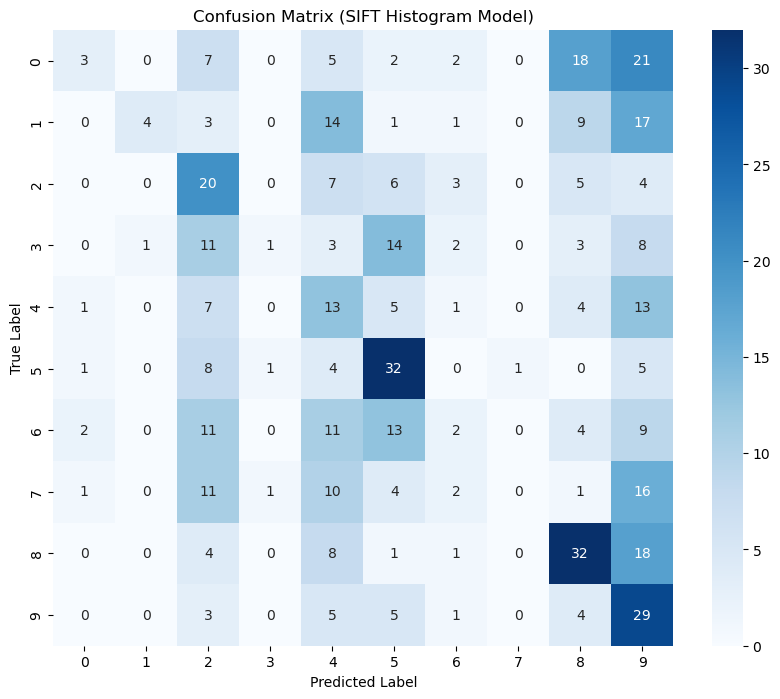

In [196]:
# Now with the best parameter you found, get the test accuracy. 
evaluate(best_color, test_hist, y_test)

y_val_pred = best_color.predict(val_hist)
cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(10, 8))
print (cm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix (SIFT Histogram Model)")
plt.show()

## Question 3. Pixels (5 points)

Finally, let's use the pixels themselves to train a classifier. That is, just reshape a 32x32x3 image into a 32x32x3=3072 vector. Than add bias dimension at the end.

**Do this:** Process the images and train a classifier. Specifically, implement `load_vector_image_with_bias()` in `assn2.py`.

In [160]:
# Freshly load the data
X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data(cifar10_dir='data/cifar-10-batches-py',
                                                                  num_training=4500, 
                                                                  num_validation=500, 
                                                                  num_test=1000)

Train data shape:  (4500, 32, 32, 3)
Train labels shape:  (4500,)
Validation data shape:  (500, 32, 32, 3)
Validation labels shape:  (500,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [161]:
from assn2 import load_vector_image_with_bias
X_train, X_val, X_test = load_vector_image_with_bias(X_train, X_val, X_test)

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (4500, 3073)
Train labels shape:  (4500,)
Validation data shape:  (500, 3073)
Validation labels shape:  (500,)
Test data shape:  (1000, 3073)
Test labels shape:  (1000,)


In [197]:
# TODO : Define regularization strengths. Put multiple values, more than 5,
#        See which regularization strength gives the best validation accuracy. 
#        Expect to get an accuracy of over 30% on the validation dataset
regularization_strengths = [1000]

# Train a classifier
best_color = train(X_train, y_train, X_val, y_val, X_test, y_test, regularization_strengths)

ValueError: too many values to unpack (expected 2)

## Question 4. Results (10 points)

**Do this**: 

4-a. Create a table of the three models' achieved accuracy, best hyperparameter, and runtime. (6 points)

4-b. Briefly describe your results in a few sentences. Feel free to share your experience and highlight any interesting observations (e.g., you had to do more hyperparameter tuning for some than others). (4 points)

## Question 5. Analysis (10 points)

**Do this**: Create a confusion matrix for each of the three models. Feel free to use existing implementations such as [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) but make sure to interpret some subset of the results and demonstrate that you understand what the values in the confusion matrices mean. Do the confusion matrices reveal any interesting insights (e.g., truck is always misclassified as automobile)? For each of the 10 classes, which model works best? Describe any hypotheses you have on the results. One or two paragraphs is sufficient.

Note: See `evaluate` in `utils.py` to learn how to use the trained model to get predictions. 

## Question 6. Improvement (9 points)

**Do this**: Identify one shortcoming of one or few of the systems you've worked with. Name an improvement you can implement to improve the system(s). You don't have to actually implement your proposed improvement, but describe exactly how you could go about implementing it and what pitfalls you might anticipate. What would be the pros and cons of this intervention? One or two paragraphs would be sufficient.